In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [56]:
##### Structure function #####
def struct_func(TOA, prop, err):
    arr_t= TOA
    arr_d= prop
    arr_e= err
    
    n=len(arr_t)

    pair_num=(n*(n-1))/2
    dist=np.zeros(int(pair_num))
    diff=np.zeros(int(pair_num))
    error=np.zeros(int(pair_num))
    selected=np.arange(n)

    k = 0
    # Pick all elements one by one 
    for i in range(0, n): 

        # See if there is a pair of this picked element 
        for j in range(i+1, n) : 

            dist[k]=abs(arr_t[selected[i]]-arr_t[selected[j]])
            diff[k]=(arr_d[selected[i]]-arr_d[selected[j]])**2
            error[k]=arr_e[selected[i]]**2 + arr_e[selected[j]]**2
            k+=1
            
    return dist, diff, error


def smooth(TOA,prop,err, bins):
    arr_t=TOA
    arr_d=prop
    arr_e=err
    data_smooth = np.zeros(len(bins))
    data_smooth[:] = np.nan
    data_smooth_err = np.zeros(len(bins))
    data_smooth_err[:] = np.nan
    data_smooth_bins = np.zeros(len(bins))
    data_smooth_bins[:] = np.nan
    weights = 1/(arr_e**2)
    for i in range(len(bins)-1):
        idx = np.argwhere((arr_t>=bins[i]) & (arr_t<bins[i+1])).flatten()
        try:
            data_smooth[i] = np.average(arr_d[idx], weights=weights[idx])
            data_smooth_err[i] = 1/np.sqrt(np.nansum(weights[idx]))
            data_smooth_bins[i] = np.nanmean(arr_t[idx])
        except Exception as e:
            print (e)
            pass
    return data_smooth_bins, data_smooth, data_smooth_err


In [4]:
data = pd.read_csv('BB_data_R3.csv')

In [5]:
#### getting numpys ######
toa = data["MJD"].to_numpy()
sc = data["Scattering(s)"].to_numpy()
sc_err = data["Sc_err(s)"].to_numpy()
dm = data["DM_final"].to_numpy()
dm_err = data["DM_err_final"].to_numpy()
bw = data["Bandwidth"].to_numpy()
cf = data["Center_Freq"].to_numpy()
width = data['Widths(s)'].to_numpy()
width_err = data['Width_err(s)'].to_numpy()

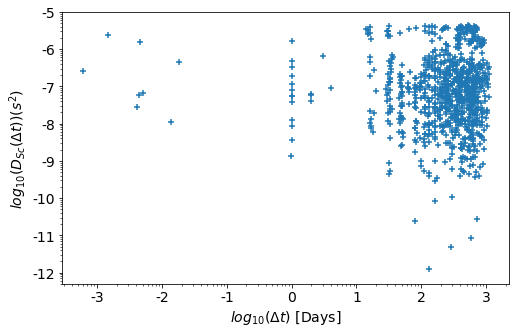

In [58]:
#### Scattering ######
# toa_diff = np.ediff1d(toa)
# sc_diff = np.abs(np.ediff1d(sc))

# arrs = np.where(sc_diff > 0.001)
# print(arrs[0][0])
# for i in range(len(arrs[0])):
#     print(toa[arrs[0][i]],"-",toa[arrs[0][i]+1])
#     print(sc[arrs[0][i]],"-",sc[arrs[0][i]+1])


dist_sc, diff_sc, err_sc = struct_func(toa, sc, sc_err)

plt.figure(figsize=(8,5))

plt.xscale('log')
plt.yscale('log')
plt.scatter(dist_sc, diff_sc-err_sc, marker='+')
plt.xlabel(r"$log_{10}(\Delta t)$ [Days]", fontsize=14)
plt.ylabel(r"$log_{10}(D_{Sc}(\Delta t))(s^{2})$", fontsize=14)
plt.ylim(0.5e-12,1e-5)

x_ticks = np.logspace(-3,3,7)
xlabel = np.arange(-3,4,1)

y_ticks = np.logspace(-12,-5,8)
ylabel = np.arange(-12,-4,1)

plt.xticks(ticks = x_ticks, labels = xlabel, fontsize=14)
plt.yticks(ticks = y_ticks, labels = ylabel, fontsize=14)
plt.show()

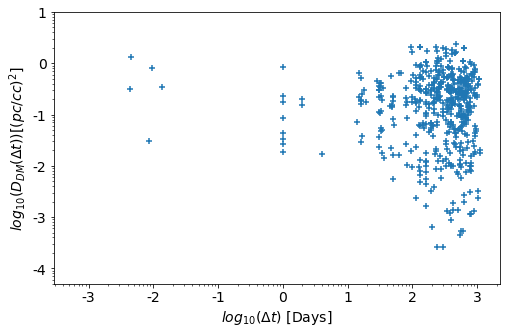

In [67]:
dist_dm, diff_dm, err_dm = struct_func(toa, dm, dm_err)

plt.figure(figsize=(8,5))

plt.xscale('log')
plt.yscale('log')
plt.scatter(dist_dm, diff_dm-err_dm, marker='+')

plt.xlabel(r"$log_{10}(\Delta t)$ [Days]", fontsize=14)
plt.ylabel(r"$log_{10}(D_{DM}(\Delta t))[(pc/cc)^{2}]$", fontsize=14)

plt.ylim(0.5e-4,0.5e1)

x_ticks = np.logspace(-3,3,7)
xlabel = np.arange(-3,4,1)

y_ticks = np.logspace(-4,1,6)
ylabel = np.arange(-4,2,1)

plt.xticks(ticks = x_ticks, labels = xlabel, fontsize=14)
plt.yticks(ticks = y_ticks, labels = ylabel, fontsize=14)
plt.show()

In [72]:
print(np.mean(bw), np.min(bw), np.max(bw))

150.71141522754425 38.31867057673509 360.117302052786
